In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("zero_time_Engine_Runtime_class2_1.csv",sep=",")
df.head()

,Engine_Runtime(s),Fuel_Level_Average
0,136,23.271429
1,192,23.271429
2,443,23.300000
3,468,23.300000
4,590,22.700000


In [3]:
x = df.values[:,0]
y = df.values[:,1]

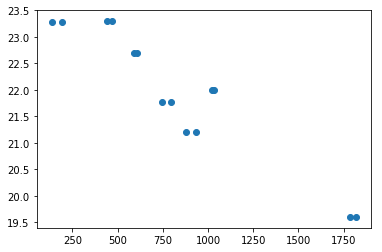

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=21,test_size=0.25)

In [6]:
print(x)
print(X_train)
print(X_test)

[  136.   192.   443.   468.   590.   606.   745.   794.   876.   932.
  1024.  1031.  1785.  1819.]
[  192.   443.  1031.   468.  1785.  1024.   136.   590.   876.   932.]
[  745.   794.  1819.   606.]


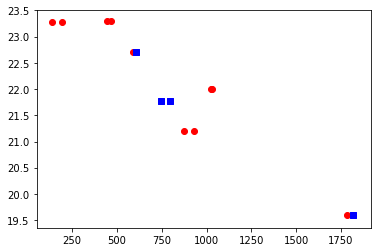

In [7]:
plt.scatter(X_train, y_train, color='r',marker='o',label='train set')
plt.scatter(X_test,y_test, color='b',marker='s',label='test set')
plt.show()

In [8]:
linReg = LinearRegression()

In [9]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)


linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = linReg.predict(X_train)
linTrainError = np.mean((y_pred - y_train)**2)
print(linTrainError)

0.180100517031


In [11]:
y_pred = linReg.predict(X_test)
linTestError = np.mean((y_pred - y_test)**2)
print(linTrainError)

0.180100517031


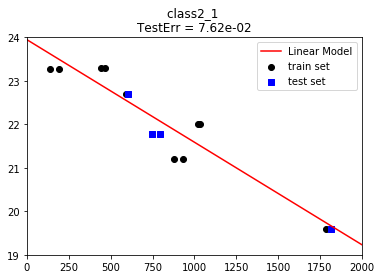

In [12]:
xval = np.linspace(0,2000,101).reshape(-1,1)
yval = linReg.predict(xval).reshape(-1,1)

plt.plot(xval,yval,color='red',label="Linear Model")
plt.scatter(X_train, y_train, color='k',marker='o',label='train set')
plt.scatter(X_test,y_test, color='b',marker='s',label='test set')

plt.xlim((0,2000))
plt.ylim((19,24))
plt.legend(loc="best")
plt.title("class2_1 \nTestErr = {:.2e}".format(linTestError))

plt.show()

In [13]:
-float(linReg.coef_)*2000 #감소한 Fuel Level

4.71240715708159